## Расчетно-графическая работа 1 ##
### Криволинейные координаты. Метрический тензор.  Тензорный анализ. ###

Студент: Винников Алексей<br>
Группа: М8О-103М-20 <br>
Вариант: 1 <br>
Преподаватель: Медведев С.В., Поповкин А.В. <br>

### Постановка задачи ###
Заданы преобразование координат на плоскости ($x,y$ - декартовы координаты, $x^1, x^2$ - криволинейные координаты) и компоненты вектора скорости в декартовых координатах. <br>
$x$=$x^{1}$<br>
$y$=$x^{1}+ x^{2}$ <br>
$\nu{_x}$=$\nu{_y}$=$k$*$x$<br>

Для удобства введем следующие обозначения

$X = x^1, Y = x^2$
$x_1 = x, x_2 = y$

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
from sympy import symbols, Function, Matrix, lambdify, solve, diff, Eq,sympify
from sympy.parsing.sympy_parser import parse_expr
from sympy.vector import Del
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Плоскости в которых преобразование координат взаимнооднозначно ##

### Установка заданных соотношений ###

In [3]:
x, y, X, Y, k, t, z = symbols("x, y, X, Y, k, t, z")

f_x = X
f_y = X + Y
v_x = v_y = k * x

expr_x, expr_y = Eq(x, f_x), Eq(y, f_y)

qs = solve([expr_x, expr_y], (X, Y))

f_X, f_Y = qs[X], qs[Y]

expr_X, expr_Y = Eq(X, f_X), Eq(Y, f_Y)
display(expr_X, expr_Y)
display(expr_x, expr_y)

Eq(X, x)

Eq(Y, -x + y)

Eq(x, X)

Eq(y, X + Y)

### Решение уравнение в котором определитель матрицы Якоби равен нулю ###

In [4]:
j_det = Matrix([f_x, f_y]).jacobian([X, Y]).det()
solve(j_det, (X, Y))

[]

Определитель матрицы Якоби никода не равен нулю, следовательно преобразования координат всегда взаимооднозначно

## 2. График сетки ##

### Построение координатной сетки ###
<font size="4">
$$x^1=const \space или \space x^2=const$$
</font>

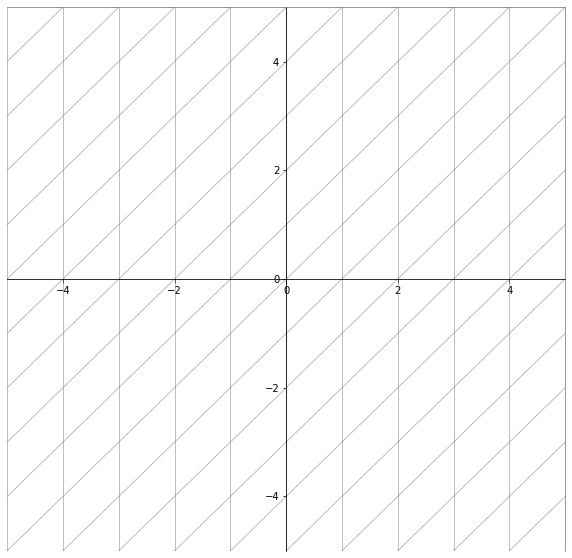

In [5]:
def subplot_fabric():
    fig, ax = plt.subplots(figsize=(10, 10))

    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

    for C in range(-5, 5):
        x_X_const = lambdify(Y, f_x.subs([(X, C)]))
        y_X_const = lambdify(Y, f_y.subs([(X, C)]))
        ax.plot([x_X_const(i) for i in range(-10,11)], [y_X_const(i) for i in range(-10,11)], 'grey', linewidth = 0.5)

    for C in range(-10,10):
        x_Y_const = lambdify(X, f_x.subs([(Y, C)]))
        y_Y_const = lambdify(X, f_y.subs([(Y, C)]))
        ax.plot([x_Y_const(i) for i in range(-10,11)], [y_Y_const(i) for i in range(-10,11)], 'grey', linewidth = 0.5)

    fig.gca().spines['left'].set_position('center')
    fig.gca().spines['bottom'].set_position('center')
    fig.gca().spines['top'].set_color("grey")
    fig.gca().spines['right'].set_color("grey")
    return fig, ax

fig, ax = subplot_fabric()

## 3. Вектора основного и взаимного базиса ##

### Вектора основного базиса ###
<font size="4">
$$Э_i = \frac {\partial r}{\partial x^i} $$
</font>

In [6]:
eh1 = [diff(f_x, X), diff(f_y, X)]
eh2 = [diff(f_x, Y), diff(f_y, Y)]
indexes = ["Э_"+str(i) for i in range(1,3)]
display(Eq(Matrix(sympify(indexes, evaluate=False)), Matrix([eh1,eh2]), evaluate=False))

Eq(Matrix([
[Э_1],
[Э_2]]), Matrix([
[1, 1],
[0, 1]]))

### Вектора взаимного базиса ###
<font size="4">
$$Э^i = grad\space x^i(x_1, x_2) $$
</font>

In [7]:
EH1 = [diff(f_X, x), diff(f_X, y)]
EH2 = [diff(f_Y, x), diff(f_Y, y)]
indexes = ["Э**"+str(i) for i in range(1,3)]
display(Eq(Matrix([parse_expr(item, evaluate=False) for item in indexes]), Matrix([EH1,EH2]), evaluate=False))

Eq(Matrix([
[Э**1],
[Э**2]]), Matrix([
[ 1, 0],
[-1, 1]]))

### Базисные векторы на графике в 4  квадрантах ###

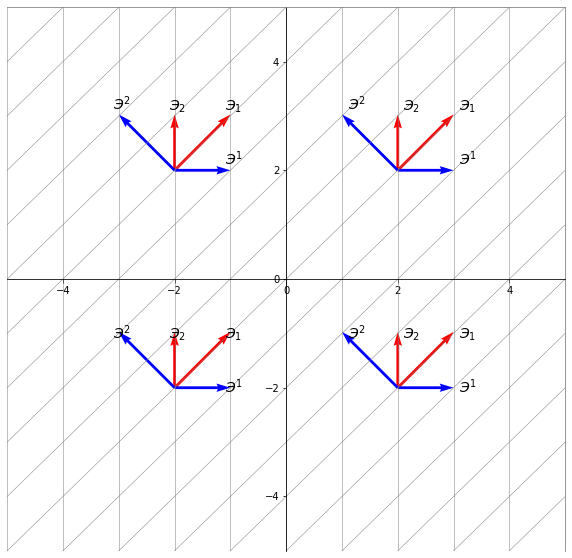

In [8]:
POINTS = [[2,2],[-2,-2],[2,-2],[-2,2]]

M_x= [p[0] for p in POINTS]
M_y = [p[1] for p in POINTS]

eh1_x, eh1_y = [int(eh1[0]) for p in POINTS], [int(eh1[1]) for p in POINTS]
eh2_x, eh2_y = [int(eh2[0]) for p in POINTS], [int(eh2[1]) for p in POINTS]
ax.quiver(M_x, M_y, eh1_x, eh1_y, scale=10, width=0.005, color="red")
ax.quiver(M_x, M_y, eh2_x, eh2_y, scale=10, width=0.005, color="red")

EH1_x, EH1_y = [int(EH1[0]) for p in POINTS], [int(EH1[1]) for p in POINTS]
EH2_x, EH2_y = [int(EH2[0]) for p in POINTS], [int(EH2[1]) for p in POINTS]
ax.quiver(M_x, M_y, EH1_x, EH1_y, scale=10, width=0.005, color="blue")
ax.quiver(M_x, M_y, EH2_x, EH2_y, scale=10, width=0.005, color="blue")

for i in range(4):
    ax.annotate("$Э_{1}$", (M_x[i]+eh1_x[i]+ np.sign(M_x[i])*0.1, M_y[i]+eh1_y[i]+ np.sign(M_y[i])*0.1),fontsize=14)
    ax.annotate("$Э_{2}$", (M_x[i]+eh2_x[i]+ np.sign(M_x[i])*0.1, M_y[i]+eh2_y[i]+ np.sign(M_y[i])*0.1),fontsize=14)
    ax.annotate("$Э^{1}$", (M_x[i]+EH1_x[i]+ np.sign(M_x[i])*0.1, M_y[i]+EH1_y[i]+ np.sign(M_y[i])*0.1),fontsize=14)
    ax.annotate("$Э^{2}$", (M_x[i]+EH2_x[i]+ np.sign(M_x[i])*0.1, M_y[i]+EH2_y[i]+ np.sign(M_y[i])*0.1),fontsize=14)
    
fig

## 4. Матрицы прямого и обратного преобразования координат ##

### Матрица прямого преобразования ###


In [9]:
A = Matrix([eh1,eh2])
display(Eq(sympify("Alpha"), A, evaluate=False))

Eq(Alpha, Matrix([
[1, 1],
[0, 1]]))

### Матрица обратного преобразования ###

In [10]:
B = Matrix([EH1,EH2]).T
display(Eq(sympify("Beta"), B, evaluate=False))

Eq(Beta, Matrix([
[1, -1],
[0,  1]]))

### Проверка корректности ###

In [11]:
E= A*B
E

Matrix([
[1, 0],
[0, 1]])

## 5. Матрицы метрического тензора ##

### Метрический тензор для контрвариантных координат ###
<br>
<font size="4">
$$g_{ij} = Э_iЭ_j $$
</font>
<br>

In [12]:
g = [[np.dot(eh1,eh1), np.dot(eh1,eh2)],[np.dot(eh2,eh1), np.dot(eh2,eh2)]]

display(Eq(sympify("g"), Matrix(g), evaluate=False))

Eq(g, Matrix([
[2, 1],
[1, 1]]))

### Метрический тензор для ковариантных координат ###
<br>
<font size="4">
$$g^{ij} = Э^iЭ^j $$
</font>
<br>

In [13]:
G = [
    [np.dot(EH1,EH1), np.dot(EH1,EH2)],
    [np.dot(EH2,EH1), np.dot(EH2,EH2)]
]
display(Eq(sympify("G"), Matrix(G), evaluate=False))

Eq(G, Matrix([
[ 1, -1],
[-1,  2]]))

### Проверка корректности ###

In [14]:
display(Matrix(np.dot(g,G)))

Matrix([
[1, 0],
[0, 1]])

## 6. Контрвариантные и ковариантные компоненты вектора скорости ##

Контрвариантные компонеты вектора скорости

In [15]:
v = np.dot(B.T, np.array([v_x,v_y])) 
v1 = parse_expr(str(v[0]))
v2 = parse_expr(str(v[1]))
display(Matrix([v1,v2]).subs([(x, X),(y, Y)]))

Matrix([
[X*k],
[  0]])

Ковариантные компонеты вектора скорости

In [16]:
V = np.dot(A, np.array([v_x,v_y]))
V1 = parse_expr(str(V[0]))
V2 = parse_expr(str(V[1]))
display(Matrix([V1, V2]).subs([(x, X),(y, Y)]))

Matrix([
[2*X*k],
[  X*k]])

## 7. График вектора скорости через контрвариантные и ковариантные компоненты ##

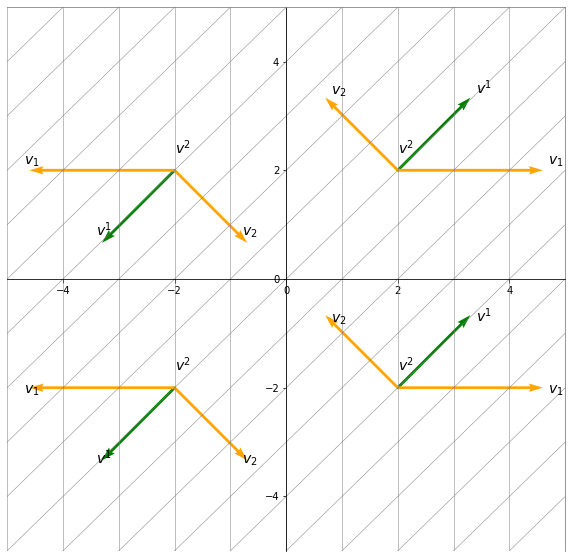

In [17]:
K =0.65
POINTS_V = [[2,2],[-2,-2],[2,-2],[-2,2]]

m_v_x= np.array([p[0] for p in POINTS_V], dtype="float32")
m_v_y = np.array([p[1] for p in POINTS_V], dtype="float32")

fig2, ax2 = subplot_fabric()

f_v_x, f_v_y = [lambdify((k,x,y),v1)(K, p[0], p[1]) for p in POINTS_V], [lambdify((k,x,y),v2)(K, p[0], p[1]) for p in POINTS_V]
v1_x, v1_y = np.array([eh1[0] * v_x_i for v_x_i in f_v_x], dtype="float32"), np.array([eh1[1] * v_x_i for v_x_i in f_v_x], dtype="float32")
v2_x, v2_y = np.array([eh2[0] * v_y_i for v_y_i in f_v_y], dtype="float32"), np.array([eh2[1] * v_y_i for v_y_i in f_v_y], dtype="float32")

ax2.quiver(m_v_x, m_v_y, v1_x, v1_y, scale=10, width=0.005, color="green")
ax2.quiver(m_v_x, m_v_y, v2_x, v2_y, scale=10, width=0.005, color="green")

for i in range(4):
    ax2.annotate("$v^{1}$", (m_v_x[i]+v1_x[i]+ np.sign(m_v_x[i])*0.1, m_v_y[i]+v1_y[i]+ np.sign(m_v_y[i])*0.1),fontsize=14)
    ax2.annotate("$v^{2}$", (m_v_x[i]+v2_x[i], m_v_y[i]+v2_y[i]+ 0.3),fontsize=14)

V_x, V_y = [lambdify((k,x,y),V1)(K, p[0], p[1]) for p in POINTS_V], [lambdify((k,x,y),V2)(K, p[0], p[1]) for p in POINTS_V]

V1_x, V1_y = np.array([EH1[0] * V_x_i for V_x_i in V_x], dtype="float32"), np.array([EH1[1] * V_x_i for V_x_i in V_x], dtype="float32")
V2_x, V2_y = np.array([EH2[0] * V_y_i for V_y_i in V_y], dtype="float32"), np.array([EH2[1] * V_y_i for V_y_i in V_y], dtype="float32")
ax2.quiver(m_v_x, m_v_y, V1_x, V1_y, scale=10, width=0.005, color="orange")
ax2.quiver(m_v_x, m_v_y, V2_x, V2_y, scale=10, width=0.005, color="orange")

for i in range(4):
    ax2.annotate("$v_{1}$", (m_v_x[i]+V1_x[i]+ np.sign(m_v_x[i])*0.1, m_v_y[i]+V1_y[i]+ np.sign(m_v_y[i])*0.1),fontsize=14)
    ax2.annotate("$v_{2}$", (m_v_x[i]+V2_x[i]+ np.sign(m_v_x[i])*0.1, m_v_y[i]+V2_y[i]+ np.sign(m_v_y[i])*0.1),fontsize=14)


## 8. Символы Кристофеля ##

### Символ Кристофеля I рода ###
<font size="4">
$$Г_{ij,k}=\frac{1}{2}(\frac{\partial g_{kj}}{\partial x^i}+\frac{\partial g_{ik}}{\partial x^j} - \frac{\partial g_{ji}}{\partial x^k})$$
</font>

In [18]:
ref = {0: X, 1: Y}

G_1 = [0.5 * (diff(g[k][j], ref[i]) + diff(g[i][k], ref[j]) - diff(g[j][i], ref[k]))
       for i in range(2) for j in range(2) for k in range(2)]

indexes = ["Г_"+str(i)+str(j)+str(k) for i in range(2) for j in range(2) for k in range(2)]
display(Eq(Matrix(sympify(indexes, evaluate=False)), Matrix(G_1)))

Eq(Matrix([
[Г_000],
[Г_001],
[Г_010],
[Г_011],
[Г_100],
[Г_101],
[Г_110],
[Г_111]]), Matrix([
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0]]))

### Символ Кристофеля II рода ###
<font size="4">
$$Г^{k}_{ij}=Э^{k}\frac{\partial Э_{i}}{\partial x^{j}} $$
</font>

In [19]:
get_eh = lambda name, i: globals().get(name + str(i))

G_2 = [np.dot(get_eh("EH", k+1), [diff(t, ref[j]) for t in get_eh("eh", i+1)]) 
       for k in range(2) for i in range(2) for j in range(2)]


indexes = ["(Г_"+str(i)+str(j)+")**"+str(k) for i in range(2) for j in range(2) for k in range(2)]

display(Eq(Matrix([parse_expr(item, evaluate=False) for item in indexes]), Matrix(G_2), evaluate=False))

Eq(Matrix([
[Г_00**0],
[Г_00**1],
[Г_01**0],
[Г_01**1],
[Г_10**0],
[Г_10**1],
[Г_11**0],
[Г_11**1]]), Matrix([
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0]]))

## 9. Ускорение в криволинейных координатах ##

### Контрвариантные компоненты ускорения ###
<font size="4">
$$w^{k}= \frac {\partial \nu^{k}}{\partial t} + \nu^i\nabla_i\nu^k, $$ 
$$где\space\nabla_i\nu^k = \frac {\partial \nu^{k}}{\partial x^i} + \nu^j Г_{ij}^{k}$$
</font>

Найдем ковариантные производные от контрвариантных компонент

In [20]:
ref_v = {0: v1.subs([(x, X), (y, Y)]), 1: v2.subs([(x, X), (y, Y)])}

ind = lambda k, i, j: int(str(k)+str(i)+str(j), base=2)
ind_op = lambda i, k: int(str(i)+str(k), base=2)

op_num = [diff(ref_v[k], ref[i]) + ref_v[0]*G_2[ind(k, 0, i)] + ref_v[1]*G_2[ind(k, 1, i)] for i in range(2) for k in range(2)]
indexes = ["grad_"+str(i) +"*(nu)**" +str(k) for i in range(1,3) for k in range(1,3)] 
display(Eq(Matrix([parse_expr(item, evaluate=False) for item in indexes]), Matrix(op_num), evaluate=False))

Eq(Matrix([
[grad_1*nu**1],
[grad_1*nu**2],
[grad_2*nu**1],
[grad_2*nu**2]]), Matrix([
[k],
[0],
[0],
[0]]))

Расчитаем контрвариантные компоненты ускорения

In [21]:
w = [diff(ref_v[k], t) +ref_v[0] * op_num[ind_op(0,k)] + ref_v[1] * op_num[ind_op(1,k)] for k in range(2)]

indexes = ["w**"+str(i) for i in range(1,3)] 
display(Eq(Matrix([parse_expr(item, evaluate=False) for item in indexes]), Matrix(w),  evaluate=False))

Eq(Matrix([
[w**1],
[w**2]]), Matrix([
[X*k**2],
[     0]]))

### Ковариантные компоненты ускорения ###
<font size="4">
$$w{k}= g_{ij}w^j $$ 
</font>

In [22]:
W = [(parse_expr(str(g[i][0]))* w[0] + parse_expr(str(g[i][1]))* w[1]) for i in range(2)]

indexes = ["omega_"+str(i) for i in range(1,3)] 
display(Eq(Matrix(sympify(indexes, evaluate=False)), Matrix(W),  evaluate=False))

Eq(Matrix([
[omega_1],
[omega_2]]), Matrix([
[2*X*k**2],
[  X*k**2]]))

## 10. Дивергенция и ротор скорости ##

### Дивергенция вектора скорости ###
<font size="4">
$$div\nu = \nabla_{i}\nu^i$$
</font>

In [23]:
div = sum([op_num[ind_op(i,i)] for i in range(2)])

div

k

### Ротор вектора скорости ###
<font size="4">
$$rot\nu = \frac{1}{\sqrt{g}}(\frac {\partial \nu_2}{\partial x^1} - \frac {\partial \nu_1}{\partial x^2})z$$
</font>

In [24]:
sqrt_g = (g[0][0]*g[1][1] - g[0][1] * g[1][0])**0.5

rot  = (1/sqrt_g *(diff(v2.subs([(x, X)]), X) - diff(v1, Y))) * z
rot

0

## 11. Градиент и лапласиан скалярной функции ##

### Градиент скалярной функции ###
<font size="4">
$$\nabla \varphi = \frac {\partial \varphi}{\partial x^i}Э^i$$
</font>

In [25]:
phi = Function('varphi')(X,Y)

grad_phi = [diff(phi, ref[0]) * get_eh("EH", i+1)[0] + diff(phi, ref[1]) * get_eh("EH", i+1)[1] for i in range(2)]
display(Matrix(grad_phi))

Matrix([
[                               Derivative(varphi(X, Y), X)],
[-Derivative(varphi(X, Y), X) + Derivative(varphi(X, Y), Y)]])

### Лапласиан скалярной функции ###
<font size="4">
$$\Delta \varphi = \frac{1}{\sqrt{g}}(\frac {\partial}{\partial x^i}(\sqrt{g}g^{ij}\frac {\partial \varphi}{\partial x^j}))$$
</font>

In [26]:
laps_phi = 1/sqrt_g *(sum([diff(sqrt_g * sum([G[i][j] * diff(phi, ref[j]) for j in range(2)]), ref[i]) for i in range(2)])) 
display(laps_phi)

Derivative(varphi(X, Y), (X, 2)) + 2*Derivative(varphi(X, Y), (Y, 2)) - 2*Derivative(varphi(X, Y), X, Y)

## 12. Градиент и лапласиан вектора скорости ##

### Градиент вектора скорости ###
<font size="4">
$$\nabla \nu = \nabla_i\nu^k Э^i Э_k$$
</font>


In [27]:
grad_v = [np.dot([np.dot(op_num[ind_op(i,k)], get_eh("EH", i+1)) for i in range(2)], get_eh("eh", k+1)) for k in range(2)]
Matrix(grad_v)

Matrix([
[k, 0],
[0, 0]])

### Лапласиан вектора скорости ###
<font size="4">
$$\Delta \nu = g^{ki}(\nabla_k\nabla_i \nu^j)Э_j$$
</font>

In [28]:
laps_v = [np.dot(
    sum([sum([np.dot(get_eh("EH", k+1), diff(op_num[ind_op(i,j)], ref[k]))  for k in range(2)]) for i in range(2)]),
    get_eh("eh", j+1)
) for j in range(2)]
    

Matrix(laps_v)

Matrix([
[0],
[0]])